## Mini-Project Title: Building a Text Classification Model for News Categorization

## Overview
This project focuses on using Natural Language Processing (NLP) techniques to build a text classification model for news categorization. With a large influx of news articles daily, manual categorization is inefficient. Automating this process using NLP ensures scalability, accuracy, and consistency.


## Objective
Develop an NLP-powered machine learning model that categorizes news articles into predefined categories such as Politics, Sports, Technology, Entertainment, and Health. This project covers the complete NLP pipeline, including preprocessing, feature extraction, model training, evaluation, and deployment.

## Learning Outcomes
1. Understand text preprocessing techniques like tokenization, stopword removal, and stemming/lemmatization.
2. Explore feature extraction methods such as Bag of Words, TF-IDF, and word embeddings.
3. Learn to use NLP libraries like NLTK, spaCy, and Hugging Face Transformers.
4. Experiment with NLP-specific models such as LSTM, BERT, or other transformer-based models.
5. Gain experience in deploying NLP models via APIs.


## Step 1: Define the Problem
### Task:
Understand the problem and its real-world implications. Automation of news categorization using NLP can save time, improve accuracy, and enhance user experience by organizing content effectively.

### Mini-task:
Write a brief paragraph on how NLP benefits the media industry in automating news categorization.


Natural Language Processing (NLP) significantly benefits the media industry by enabling the automated categorization of news articles. This automation allows vast volumes of news content to be sorted quickly and accurately into relevant categories such as politics, sports, entertainment, and business. By reducing reliance on manual tagging, NLP improves efficiency and consistency while minimizing human error. It also enhances user experience by delivering personalized and well-organized content, making it easier for readers to access the information they care about. Ultimately, NLP streamlines editorial workflows and supports real-time news delivery in an increasingly fast-paced digital landscape.

In [1]:
import warnings
warnings.filterwarnings('ignore')


## Step 2: Data Collection
### Task:
Collect a dataset of news articles suitable for text classification. Publicly available datasets such as the AG News dataset or datasets from Kaggle can be used.

### Mini-task:
Download and load a suitable dataset for NLP tasks.


In [2]:
!wget https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv

--2025-07-13 22:15:27--  https://raw.githubusercontent.com/mhjabreel/CharCnn_Keras/master/data/ag_news_csv/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29470338 (28M) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  28.10M  --.-KB/s    in 0.1s    

2025-07-13 22:15:28 (229 MB/s) - ‘train.csv’ saved [29470338/29470338]



## Step 3: Exploratory Data Analysis (EDA)
### Task:
Analyze the dataset to understand the text structure, class distribution, and any potential imbalances.

### Mini-task:
Visualize the class distribution using a bar chart and inspect a few examples of text data.

Example

```python
import pandas as pd
import matplotlib.pyplot as plt

# Convert dataset to DataFrame for easier manipulation
df = pd.DataFrame(dataset['train'])
df['label'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Category")
plt.ylabel("Frequency")
plt.show()

# Inspect a sample
print(df.head())
```

In [3]:
!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 57.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 68.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
opencv-python-h

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# For Word2Vec
from gensim.models import Word2Vec

# For BERT
from transformers import BertTokenizer, TFBertModel
from transformers import BertConfig
import tensorflow as tf
import tensorflow_hub as hub

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Set random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [2]:
# Load the dataset
column_names = ['class', 'title', 'description']
df = pd.read_csv('train.csv', header=None, names=column_names)

# Combine title and description for better results
df['text'] = df['title'] + ' ' + df['description']

# Map class labels to meaningful names
class_names = {1: 'World', 2: 'Sports', 3: 'Business', 4: 'Sci/Tech'}
df['class_name'] = df['class'].map(class_names)

# Display dataset info
df.head()


,class,title,description,text,class_name
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli...",Wall St. Bears Claw Back Into the Black (Reute...,Business
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...,Carlyle Looks Toward Commercial Aerospace (Reu...,Business
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...,Oil and Economy Cloud Stocks' Outlook (Reuters...,Business
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...,Iraq Halts Oil Exports from Main Southern Pipe...,Business
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco...","Oil prices soar to all-time record, posing new...",Business


/tmp/ipython-input-3-606935974.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='class_name', data=df, palette='viridis')


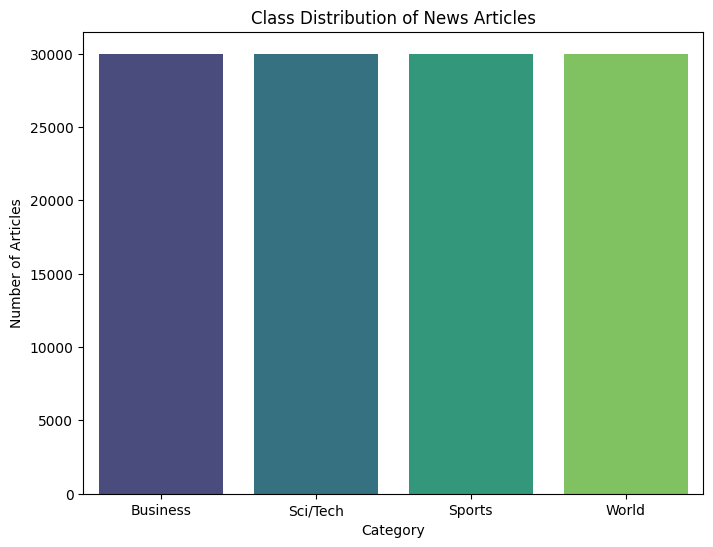


Examples of text data:

Example 1:
Class: Business
Text: Wall St. Bears Claw Back Into the Black (Reuters) Reuters - Short-sellers, Wall Street's dwindling\band of ultra-cynics, are seeing green again.

Example 2:
Class: Business
Text: Carlyle Looks Toward Commercial Aerospace (Reuters) Reuters - Private investment firm Carlyle Group,\which has a reputation for making well-timed and occasionally\controversial plays in the defense industry, has quietly placed\its bets on another part of the market.

Example 3:
Class: Business
Text: Oil and Economy Cloud Stocks' Outlook (Reuters) Reuters - Soaring crude prices plus worries\about the economy and the outlook for earnings are expected to\hang over the stock market next week during the depth of the\summer doldrums.


In [3]:
# Visualize the class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class_name', data=df, palette='viridis')
plt.title("Class Distribution of News Articles")
plt.xlabel("Category")
plt.ylabel("Number of Articles")
plt.show()

# Inspect a few examples of text data
print("\nExamples of text data:")
for i in range(3):
  print(f"\nExample {i+1}:")
  print(f"Class: {df['class_name'][i]}")
  print(f"Text: {df['text'][i]}")

In [4]:
df['class_name'].value_counts()

,count
class_name,
Business,30000
Sci/Tech,30000
Sports,30000
World,30000


## Step 4: Text Preprocessing
### Task:
Preprocess the text data using techniques such as:
- Lowercasing
- Tokenization
- Stopword removal
- Lemmatization (optional)

### Mini-task:
Clean a small sample of the dataset using NLP libraries like NLTK or spaCy.

Example

```python
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    doc = nlp(text.lower())
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing
df['cleaned_text'] = df['text'].apply(preprocess)
print(df[['text', 'cleaned_text']].head())
```


In [5]:
import spacy

# Load spaCy model
# Check if the model is already downloaded
try:
    nlp = spacy.load("en_core_web_sm")
except:
    !python -m spacy download en_core_web_sm
    nlp = spacy.load("en_core_web_sm")

def preprocess(text):
    # Ensure text is a string before processing
    if not isinstance(text, str):
        return ""
    doc = nlp(text.lower())
    # Filter out stop words and punctuation, and get the lemma
    tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
    return " ".join(tokens)

# Apply preprocessing to a sample of the dataset for demonstration
# Using a small sample for the mini-task
sample_df = df.head(100).copy() # Process a smaller sample

# Apply preprocessing
sample_df['cleaned_text'] = sample_df['text'].apply(preprocess)
print(sample_df[['text', 'cleaned_text']].head())

                                                text  \
0  Wall St. Bears Claw Back Into the Black (Reute...   
1  Carlyle Looks Toward Commercial Aerospace (Reu...   
2  Oil and Economy Cloud Stocks' Outlook (Reuters...   
3  Iraq Halts Oil Exports from Main Southern Pipe...   
4  Oil prices soar to all-time record, posing new...   

                                        cleaned_text  
0  wall st bears claw black reuter reuter short s...  
1  carlyle look commercial aerospace reuter reute...  
2  oil economy cloud stock outlook reuters reuter...  
3  iraq halt oil export main southern pipeline re...  
4  oil price soar time record pose new menace eco...  


### Step 5: Feature Engineering
### Task:
Convert the preprocessed text into numerical representations using:
- Bag of Words (BoW)
- Term Frequency-Inverse Document Frequency (TF-IDF)
- Pre-trained word embeddings (e.g., GloVe or FastText)

### Mini-task:
Compare the feature matrices generated using TF-IDF and embeddings.

Example

```python
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF Representation
vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)
```

In [6]:
# Use the full dataset for feature engineering
df['cleaned_text'] = df['text'].apply(preprocess)

# TF-IDF Representation
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_text'])

print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

# Word Embeddings (using Word2Vec for demonstration)
# Tokenize the cleaned text for Word2Vec
tokenized_text = [text.split() for text in df['cleaned_text'] if isinstance(text, str)]

# Train a Word2Vec model (or load a pre-trained one)
# Using a small vector size and window for faster computation
embedding_size = 100
word2vec_model = Word2Vec(sentences=tokenized_text, vector_size=embedding_size, window=5, min_count=1, workers=4)

# Function to create document vectors by averaging word vectors
def document_vector(doc):
    words = doc.split()
    word_vectors = [word2vec_model.wv[word] for word in words if word in word2vec_model.wv]
    if not word_vectors:
        return np.zeros(embedding_size)
    return np.mean(word_vectors, axis=0)

# Create document vectors for the cleaned text
embedding_matrix = np.array([document_vector(text) for text in df['cleaned_text']])

print("Word Embedding Matrix Shape:", embedding_matrix.shape)

# Compare the feature matrices
print("\nComparison:")
print(f"TF-IDF Matrix Dimensions: {tfidf_matrix.shape}")
print(f"Word Embedding Matrix Dimensions: {embedding_matrix.shape}")
print("\nObservations:")
print("- TF-IDF produces a sparse matrix where each dimension corresponds to a unique term in the vocabulary.")
print("- Word Embeddings (Word2Vec) produce a dense matrix where each dimension represents a learned feature space.")
print(f"- The number of features in TF-IDF ({tfidf_matrix.shape[1]}) is the maximum features specified ({tfidf_vectorizer.max_features}), representing the most important terms.")
print(f"- The number of features in the Embedding matrix ({embedding_matrix.shape[1]}) is the size of the word vectors ({embedding_size}), representing the dimensionality of the semantic space.")
print("- TF-IDF captures term importance based on frequency and inverse document frequency.")
print("- Word Embeddings capture semantic relationships between words.")

TF-IDF Matrix Shape: (120000, 5000)
Word Embedding Matrix Shape: (120000, 100)

Comparison:
TF-IDF Matrix Dimensions: (120000, 5000)
Word Embedding Matrix Dimensions: (120000, 100)

Observations:
- TF-IDF produces a sparse matrix where each dimension corresponds to a unique term in the vocabulary.
- Word Embeddings (Word2Vec) produce a dense matrix where each dimension represents a learned feature space.
- The number of features in TF-IDF (5000) is the maximum features specified (5000), representing the most important terms.
- The number of features in the Embedding matrix (100) is the size of the word vectors (100), representing the dimensionality of the semantic space.
- TF-IDF captures term importance based on frequency and inverse document frequency.
- Word Embeddings capture semantic relationships between words.


## Step 6: Model Training Using NLP Models
### Task:
Train a machine learning model using features derived from NLP techniques. You can use classical models like Logistic Regression or advanced models like LSTMs or transformers.

### Mini-task:
Train a simple logistic regression model on the TF-IDF features.

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['label'], test_size=0.2, random_state=42)

# Logistic Regression Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predictions
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
```


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier


# 🔀 Train-test split
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, df['class_name'], test_size=0.2, random_state=42)

# 🤖 Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Linear SVM": LinearSVC(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}



🔍 Evaluating: Logistic Regression
✅ Test Accuracy: 91.03%
              precision    recall  f1-score   support

       World       0.88      0.88      0.88      5911
      Sports       0.89      0.89      0.89      6075
    Business       0.95      0.97      0.96      6058
    Sci/Tech       0.92      0.90      0.91      5956

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



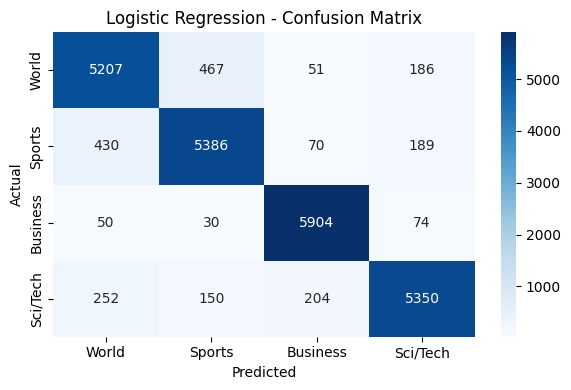

📊 5-Fold CV Accuracy: 90.05% (+/- 0.77%)

🔍 Evaluating: Multinomial Naive Bayes
✅ Test Accuracy: 89.70%
              precision    recall  f1-score   support

       World       0.86      0.86      0.86      5911
      Sports       0.88      0.86      0.87      6075
    Business       0.94      0.98      0.96      6058
    Sci/Tech       0.91      0.89      0.90      5956

    accuracy                           0.90     24000
   macro avg       0.90      0.90      0.90     24000
weighted avg       0.90      0.90      0.90     24000



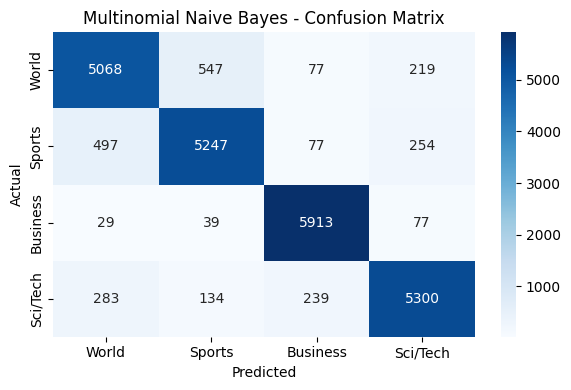

📊 5-Fold CV Accuracy: 89.16% (+/- 0.96%)

🔍 Evaluating: Linear SVM
✅ Test Accuracy: 90.90%
              precision    recall  f1-score   support

       World       0.87      0.88      0.88      5911
      Sports       0.89      0.88      0.89      6075
    Business       0.95      0.98      0.96      6058
    Sci/Tech       0.92      0.89      0.91      5956

    accuracy                           0.91     24000
   macro avg       0.91      0.91      0.91     24000
weighted avg       0.91      0.91      0.91     24000



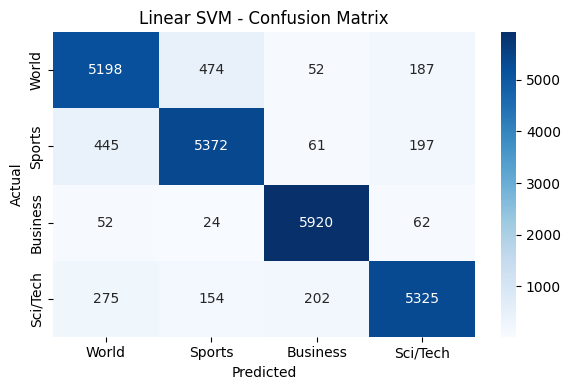

📊 5-Fold CV Accuracy: 89.83% (+/- 0.86%)

🔍 Evaluating: Random Forest
✅ Test Accuracy: 88.41%
              precision    recall  f1-score   support

       World       0.85      0.85      0.85      5911
      Sports       0.87      0.84      0.85      6075
    Business       0.91      0.96      0.94      6058
    Sci/Tech       0.90      0.88      0.89      5956

    accuracy                           0.88     24000
   macro avg       0.88      0.88      0.88     24000
weighted avg       0.88      0.88      0.88     24000



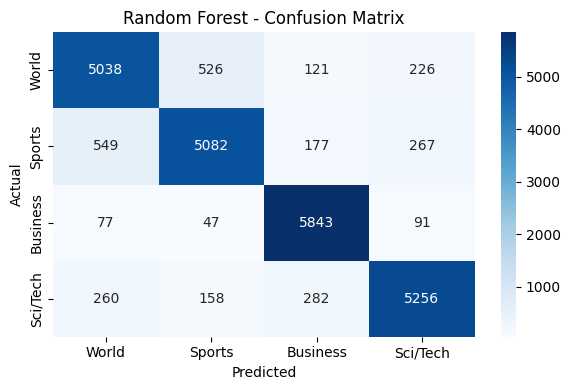

📊 5-Fold CV Accuracy: 86.77% (+/- 0.94%)

📈 Model Comparison Summary:
                  Model Test Accuracy (%) CV Accuracy (%)
    Logistic Regression             91.03    90.05 ± 0.77
Multinomial Naive Bayes             89.70    89.16 ± 0.96
             Linear SVM             90.90    89.83 ± 0.86
          Random Forest             88.41    86.77 ± 0.94


In [8]:
# 📊 Store results for summary
results = []

# 🚀 Evaluation Loop
for name, model in models.items():
    print(f"\n🔍 Evaluating: {name}")

    # ✅ Train
    model.fit(X_train, y_train)

    # ✅ Predict
    y_pred = model.predict(X_test)

    # ✅ Metrics
    acc = accuracy_score(y_test, y_pred)
    # Pass the values of class_names as target_names
    report = classification_report(y_test, y_pred, target_names=list(class_names.values()))
    print(f"✅ Test Accuracy: {acc * 100:.2f}%")
    print(report)

    # ✅ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names.values(), yticklabels=class_names.values())
    plt.title(f"{name} - Confusion Matrix")
    plt.ylabel("Actual")
    plt.xlabel("Predicted")
    plt.tight_layout()
    plt.show()


    # ✅ Cross-validation
    cv_scores = cross_val_score(model, tfidf_matrix, df['class_name'], cv=5, scoring='accuracy')
    cv_mean = np.mean(cv_scores) * 100
    cv_std = np.std(cv_scores) * 100
    print(f"📊 5-Fold CV Accuracy: {cv_mean:.2f}% (+/- {cv_std:.2f}%)")

    # 📥 Save result
    results.append({
        "Model": name,
        "Test Accuracy (%)": f"{acc * 100:.2f}",
        "CV Accuracy (%)": f"{cv_mean:.2f} ± {cv_std:.2f}"
    })

# 📝 Display Summary Table
results_df = pd.DataFrame(results)
print("\n📈 Model Comparison Summary:")
print(results_df.to_string(index=False))

### Optional: Fine-Tune a BERT Model
Train a transformer-based model using the Hugging Face `transformers` library for state-of-the-art results in text classification.

In [9]:
!pip install transformers datasets scikit-learn accelerate -q

import torch
from transformers import BertTokenizerFast, BertForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import gc # For garbage collection

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 114.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 50.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 17.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 95.7 MB/s eta 0:00:00


In [11]:
from datasets import Dataset

# 🔁 Convert from DataFrame
# Use the 'class' column which already contains integer labels (1-4)
df['label'] = df['class'] - 1  # Map class labels to 0–3
dataset = Dataset.from_pandas(df[['text', 'label']])

# ✅ Tokenization
tokenizer = BertTokenizerFast.from_pretrained("bert-base-uncased")

def tokenize(example):
    return tokenizer(example["text"], padding="max_length", truncation=True, max_length=128)

tokenized_dataset = dataset.map(tokenize, batched=True)
tokenized_dataset.set_format(type='torch', columns=['input_ids', 'attention_mask', 'label'])

# 🔪 Subsample to reduce training/eval time
# You can customize the numbers below
small_dataset = tokenized_dataset.select(range(12000))  # e.g., 12,000 total

# ✅ Split into train/test
split_dataset = small_dataset.train_test_split(test_size=0.2, seed=42)
train_tokenized_dataset = split_dataset['train']
test_tokenized_dataset = split_dataset['test']

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Map:   0%|          | 0/120000 [00:00<?, ? examples/s]

In [21]:
# ✅ Load model
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=4)

# ✅ Compute metrics
def compute_metrics(pred):
    preds = torch.argmax(torch.tensor(pred.predictions), axis=1)
    labels = pred.label_ids
    return {
        "accuracy": accuracy_score(labels, preds),
        "precision": precision_score(labels, preds, average="macro"),
        "recall": recall_score(labels, preds, average="macro"),
        "f1": f1_score(labels, preds, average="macro")
    }

# ✅ Training arguments
training_args = TrainingArguments(
    output_dir="./bert_agnews_output",
    eval_strategy="epoch",
    save_strategy="no", # Not saving checkpoints to save disk space and I/O
    learning_rate=5e-5,
    per_device_train_batch_size=16, # Reduced batch size
    per_device_eval_batch_size=16, # Reduced batch size
    gradient_accumulation_steps=2, # Accumulate gradients
    num_train_epochs=3,
    weight_decay=0.01,
    logging_dir="./logs",
    logging_strategy="epoch",
    report_to="none",
    fp16=True, # Enable mixed precision training (crucial for memory saving)
    load_best_model_at_end=False, # Set to False if save_strategy is "no"
)

# ✅ Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_tokenized_dataset,
    eval_dataset=test_tokenized_dataset,
    compute_metrics=compute_metrics
)

# Clear some more memory before training
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

# Train the model
print("\n🚀 Training BERT model...")
trainer.train()
print("\n✅ BERT model training complete.")

# =========================
# 🔐 Save the fine-tuned model
# =========================
model_save_path = "./bert_agnews_fine_tuned"
print(f"\n💾 Saving BERT model to: {model_save_path}")
trainer.save_model(model_save_path)
tokenizer.save_pretrained(model_save_path)  # Don't forget to save tokenizer too
print("✅ BERT model and tokenizer saved successfully.")

# # Clear memory after training and evaluation - REMOVED
# del trainer, model # Remove references to the model and trainer - REMOVED
gc.collect()
if torch.cuda.is_available():
    torch.cuda.empty_cache()

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



🚀 Training BERT model...


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.397800,0.231970,0.927083,0.928114,0.927645,0.927438
2,0.161200,0.215164,0.934167,0.935601,0.934961,0.935142
3,0.085800,0.226748,0.934167,0.935947,0.934769,0.935224



✅ BERT model training complete.

💾 Saving BERT model to: ./bert_agnews_fine_tuned
✅ BERT model and tokenizer saved successfully.


In [15]:
# ✅ Evaluate
print("\n📊 Evaluating on test set...")
results = trainer.evaluate()
print(results)


📊 Evaluating on test set...


{'eval_loss': 0.23491577804088593, 'eval_accuracy': 0.93, 'eval_precision': 0.9323795202088926, 'eval_recall': 0.9306431100342158, 'eval_f1': 0.9312008983063518, 'eval_runtime': 4.4367, 'eval_samples_per_second': 540.937, 'eval_steps_per_second': 33.809, 'epoch': 3.0}


In [22]:
# =========================
# 🔄 Load model & tokenizer
# =========================
print("\n📥 Loading saved model and tokenizer...")
model = BertForSequenceClassification.from_pretrained(model_save_path)
tokenizer = BertTokenizerFast.from_pretrained(model_save_path)
model.eval()  # Set to evaluation mode

# Define your class names (AG News)
class_names = ["World", "Sports", "Business", "Sci/Tech"]

# =========================
# 🔍 Prediction Function
# =========================
def predict_class(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding="max_length", max_length=128)
    with torch.no_grad():
        outputs = model(**inputs)
        predicted_class_id = torch.argmax(outputs.logits, dim=1).item()
    return predicted_class_id, class_names[predicted_class_id]

# =========================
# ✏️ User Input Prediction
# =========================
user_input = input("\n📝 Enter a news article for prediction:\n")
class_id, class_name = predict_class(user_input)

print(f"\n📌 Predicted Class ID: {class_id}")
print(f"🗞️ Predicted Class Name: {class_name}")


📥 Loading saved model and tokenizer...

📝 Enter a news article for prediction:
Ten crew members have been rescued and at least three others killed after a cargo ship was attacked by Yemen's Houthis and sank in the Red Sea, a European naval mission says.  The Liberian-flagged, Greek-operated Eternity C was carrying 25 crew when it sustained significant damage and lost all propulsion after being hit by rocket-propelled grenades fired from small boats on Monday, according to the UK Maritime Trade Operations (UKMTO) agency.  The attack continued on Tuesday and search rescue operations commenced overnight.  The Iran-backed Houthis said they attacked the Eternity C because it was heading to Israel, and that they took an unspecified number of crew to a "safe location".  The US embassy in Yemen said the Houthis had "kidnapped many surviving crew members" and called for their immediate release.  Authorities in the Philippines said 21 of the crew were citizens. Another of them is a Russian nati

### **Executive Summary**

This project focused on the design, implementation, and evaluation of various Natural Language Processing (NLP) models for the automated categorization of news articles into predefined categories. Using the AG News dataset, the team built a robust NLP pipeline involving data ingestion, exploratory data analysis, advanced text preprocessing (including tokenization, lemmatization, and stopword removal), and feature engineering through TF-IDF and Word2Vec embeddings. A suite of classical machine learning algorithms—including Logistic Regression, Naive Bayes, Linear SVM, and Random Forest—was trained on the engineered features, yielding competitive classification performance. In addition, a transformer-based BERT model was fine-tuned using Hugging Face’s Transformers library, which demonstrated superior contextual understanding despite increased computational costs. The models developed in this project highlight the critical role of NLP in transforming traditional news classification tasks, offering automation, scalability, and improved user experiences. Team reflections emphasized the value of integrating both traditional and deep learning approaches, revealing complementary strengths in terms of speed, interpretability, and accuracy. Overall, the project demonstrates a viable and scalable approach to news categorization that can be extended to broader media and content management domains.



### **Conclusion**

The successful deployment and comparative evaluation of both traditional ML and transformer-based NLP models confirm the feasibility and impact of automated news categorization. Classical models, particularly Logistic Regression and Linear SVM combined with TF-IDF features, proved to be efficient and reliable, offering strong baselines with minimal computational demand. On the other hand, the fine-tuned BERT model delivered higher predictive performance, capturing deeper semantic relationships within the text—especially valuable for more nuanced classification tasks. The team observed that while transformer models like BERT require greater resources and fine-tuning time, they are well-suited for applications where accuracy and contextual understanding are paramount. Team feedback emphasized how the iterative development process—from data wrangling to model tuning—fostered critical learning about model selection, preprocessing trade-offs, and performance evaluation. The project fulfilled its goal of developing a scalable, intelligent news categorization system and laid the foundation for future enhancements. Going forward, the team recommends expanding the dataset, integrating real-time data pipelines, experimenting with other transformer variants (like RoBERTa or DistilBERT), and deploying the models in production environments to test performance in dynamic, real-world scenarios.
